# CE880: An Approachable Introduction to Data Science
### Prepared by: Haider Raza (h.raza@essex.ac.uk)
### Approximate time: 120 minutes

***
## Learning Outcome 
---
#### Classification/Evaluation Metrics
--- 
* Confusion Matrix
* False Positive Rate (Type-I Error)
* False Negative Rate (Type-II Error)
* Accuracy 
* Recall (True Positive Rate / Sensitivity)
* Precision
* F-Beta
* Cohen - Kappa
* ROC - AUC Score
* PR Curve


<p align="center">
  <img width="900" height="500" src="https://pbs.twimg.com/media/FPX2rSDXwAEXPkN?format=png&name=900x900">
</p>

## Prerequisites

* **Condition positive (P)**: the number of real positive cases in the data
* **Condition negative (N)** the number of real negative cases in the data

* **True positive**: Sick people correctly identified as sick
* **False positive**: Healthy people incorrectly identified as sick
* **True negative**: Healthy people correctly identified as healthy
* **False negative**: Sick people incorrectly identified as healthy

<p align="center">
  <img width="500" height="300" src="https://pbs.twimg.com/media/FQGkKEZWQAco1Xu?format=jpg&name=medium">
</p>

## Classification Accuracy 

<p align="center">
  <img width="400" height="90" src="https://miro.medium.com/max/1400/0*qLxAWTs-gZjQvTi4.jpg">
</p>

Classification accuracy is the ratio of correct predictions to total predictions made.

`classification accuracy = correct predictions / total predictions`

i.e. 80 out of 100 samples are correctly classified. Then `80/100 = 0.8` 

It is often presented as a percentage (%) by multiplying the result by 100.

`classification accuracy = correct predictions / total predictions * 100`
`80/100 * 100 = 80%` 

Classification accuracy can also easily be turned into a misclassification rate or error rate by inverting the value, such as:

`error rate = (1 - (correct predictions / total predictions)) * 100`


#### Problem with classification accuracy:

**When your data has more than 2 classes**: 
With 3 or more classes you may get a classification accuracy of 80%, but you don’t know if that is because all classes are being predicted equally well or whether one or two classes are being neglected by the model.

**When your data does not have an even number of classes (Data Imbalance)**:
You may achieve accuracy of 90% or more, but this is not a good score if 90 records for every 100 belong to one class and you can achieve this score by always predicting the most common class value.

Classification accuracy can hide the detail you need to diagnose the performance of your model. But thankfully we can tease apart this detail by using a **confusion matrix**.

## Confusion Matrix

A confusion matrix is a summary of prediction results on a classification problem. In other words, the confusion matrix shows the ways in which your classification model is confused when it makes predictions.

It gives you insight not only into the ***errors*** being made by your classifier but more importantly the ***types of errors*** that are being made.

<p align="center">
  <img width="400" height="250" src="https://miro.medium.com/max/1400/1*fxiTNIgOyvAombPJx5KGeA.png">
</p>

**Example**: Two-class classification problem of predicting whether a photograph contains a Cat or a Dog.

We have a test dataset of 10 records with expected outcomes and a set of predictions from our classification algorithm.

### Accuracy

In [ ]:
# Classification Accuracy
from sklearn.metrics import accuracy_score

YTrue = ['Dog', 'Dog', 'Cat', 'Dog', 'Cat', 'Cat', 'Cat', 'Dog', 'Dog', 'Cat']
YPred = ['Dog', 'Cat', 'Cat', 'Dog', 'Dog', 'Dog', 'Cat', 'Dog', 'Dog', 'Cat']

accuracy_score(YTrue, YPred)*100

70.0

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(YTrue, YPred, labels = ['Dog', 'Cat'])
print(cf_matrix)

[[4 1]
 [2 3]]


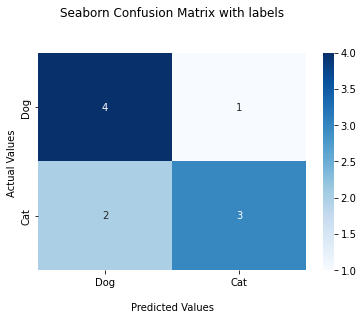

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Dog','Cat'])
ax.yaxis.set_ticklabels(['Dog','Cat'])

## Display the visualization of the Confusion Matrix.
plt.show()

* “True Positive” : correctly predicted dog as dog.
* “False positive” : incorrectly predicted dog as cat.
* “True Negative” : correctly predicted cat as cat.
* “False Negative” : incorrectly predicted cat as dog.

## Example: COVID vs Non-COVID

[[3 2]
 [1 4]]
4 1 2 3
              precision    recall  f1-score   support

       COVID       0.67      0.80      0.73         5
   Not-COVID       0.75      0.60      0.67         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



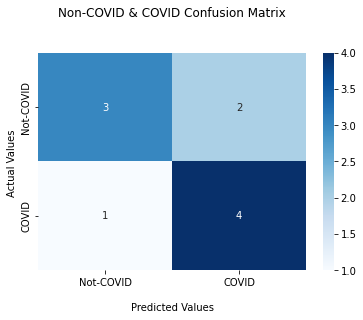

In [ ]:
# Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

YTrue = ['COVID', 'COVID',     'Not-COVID', 'COVID', 'Not-COVID', 'Not-COVID', 'Not-COVID', 'COVID', 'COVID', 'Not-COVID']
YPred = ['COVID', 'Not-COVID', 'COVID',     'COVID', 'Not-COVID', 'COVID',      'Not-COVID', 'COVID', 'COVID', 'Not-COVID']

cf_matrix = confusion_matrix(YTrue, YPred, labels= ['Not-COVID', 'COVID'])
print(cf_matrix)

tn, fp, fn, tp = confusion_matrix(YTrue, YPred).ravel()
print(tn, fp, fn, tp)

cf_report = classification_report(YTrue, YPred)
print(cf_report)

import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Non-COVID & COVID Confusion Matrix\n\n');
ax.set_ylabel('Actual Values ');
ax.set_xlabel('\nPredicted Values')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not-COVID', 'COVID'])
ax.yaxis.set_ticklabels(['Not-COVID', 'COVID'])

## Display the visualization of the Confusion Matrix.
plt.show()


### Important point to note:

*We always aim to reduce **FP** (Type-I error) and **FN** ((Type-II error)).*

In [ ]:
import sklearn.metrics
import math
import pandas as pd

def matrix_metrix(real_values,pred_values,beta):
   CM = confusion_matrix(real_values,pred_values)
   TN = CM[1][1]
   FP = CM[1][0] 
   TP = CM[0][0]
   FN = CM[0][1]
   Population = TN+FN+TP+FP
   Prevalence = round( (TP+FP) / Population,2)
   Accuracy   = round( (TP+TN) / Population,4)
   Precision  = round( TP / (TP+FP),4 )
   NPV        = round( TN / (TN+FN),4 )
   FDR        = round( FP / (TP+FP),4 )
   FOR        = round( FN / (TN+FN),4 ) 
   check_Pos  = Precision + FDR
   check_Neg  = NPV + FOR
   Recall     = round( TP / (TP+FN),4 )
   FPR        = round( FP / (TN+FP),4 )
   FNR        = round( FN / (TP+FN),4 )
   TNR        = round( TN / (TN+FP),4 ) 
   check_Pos2 = Recall + FNR
   check_Neg2 = FPR + TNR
   LRPos      = round( Recall/FPR,4 ) 
   LRNeg      = round( FNR / TNR ,4 )
   DOR        = round( LRPos/LRNeg)
   F1         = round ( 2 * ((Precision*Recall)/(Precision+Recall)),4)
   FBeta      = round ( (1+beta**2)*((Precision*Recall)/((beta**2 * Precision)+ Recall)) ,4)
   MCC        = round ( ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))  ,4)
   BM         = Recall+TNR-1
   MK         = Precision+NPV-1
   mat_met = pd.DataFrame({
'Metric':['TP','TN','FP','FN','Prevalence','Accuracy','Precision','NPV','FDR','FOR','check_Pos','check_Neg','Recall','FPR','FNR','TNR','check_Pos2','check_Neg2','LR+','LR-','DOR','F1','FBeta','MCC','BM','MK'],     'Value':[TP,TN,FP,FN,Prevalence,Accuracy,Precision,NPV,FDR,FOR,check_Pos,check_Neg,Recall,FPR,FNR,TNR,check_Pos2,check_Neg2,LRPos,LRNeg,DOR,F1,FBeta,MCC,BM,MK]})
   return (mat_met)

In [ ]:
matrix_metrix(YTrue,YPred,0.5)

,Metric,Value
0,TP,4.0000
1,TN,3.0000
2,FP,2.0000
3,FN,1.0000
4,Prevalence,0.6000
5,Accuracy,0.7000
6,Precision,0.6667
7,NPV,0.7500
8,FDR,0.3333
9,FOR,0.2500


### False Positive Rate: Type I error rate 

False positive rate (FPR) is probability of false alarm

`FPR = FP / FP + TN`


In [ ]:
FPR = (2 / (2 + 3)) 
print(FPR)

0.4


### False Negative Rate: Type II error rate

`FNR = FN / TP + FN`

In [ ]:
FNR = (1 / (4 + 1)) 
print(FNR)

0.2


## Now Let's consider Imbalance Dataset

Suppose we have 10K records, where label A being 9k and label B being 1K. Now suppose we are calculating the Accuracy, then its obvious that we will get a 90% accuracy were the model predicts most of the records being tagged to label A. Clearly this is not a good way of calculating the efficiency of the model if our dataset is not balanced. So, in such such situations we use `Recall`, `Precision`, `F-beta` as the classification metric

We are now looking at the second half of the tree

<p align="center">
  <img width="900" height="500" src="https://pbs.twimg.com/media/FPX2rSDXwAEXPkN?format=png&name=900x900">
</p>

### Recall: Sensitivity, Hit Rate, or True Positive Rate (TPR)

Recall says that out of the `total actual positive values`, how many `positive` were we able to predict correctly.

*Example: If we have 100 Covid Positive Cases then out of 100 cases how many we have correctly predcited?*

* Note: In case of Recall we deal with 'False Negative'

<p align="center">
  <img width="450" height="60" src="https://miro.medium.com/max/1400/1*R6tkaVAzoAlCK4d7X3nBog.webp">
</p>



In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]

## Calculate metrics for each label, and find their unweighted mean. 
## This does not take label imbalance into account.
print(recall_score(y_true, y_pred, average='macro'))

## Calculate metrics globally by counting the total true positives, 
## false negatives and false positives.
print(recall_score(y_true, y_pred, average='micro'))

## Calculate metrics for each label, and find their average weighted by support 
## (the number of true instances for each label). 
print(recall_score(y_true, y_pred, average='weighted'))

print(classification_report(y_true, y_pred, target_names=['0', '1', '2']))

0.3333333333333333
0.3333333333333333
0.3333333333333333
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2

    accuracy                           0.33         6
   macro avg       0.22      0.33      0.27         6
weighted avg       0.22      0.33      0.27         6



### Precision: (Positive Predictive Value (PPV))

Precision says that out of the `total predicted positive result`, how many results were actually positive. 

* Note: in case of Precision we deal with 'False Positive'

<p align="center">
  <img width="450" height="60" src="https://miro.medium.com/max/1400/1*iD_8Ty8kYQuTJcr55juRlw.webp">
</p>


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]

## Calculate metrics for each label, and find their unweighted mean. 
## This does not take label imbalance into account.
print(precision_score(y_true, y_pred, average='macro'))

## Calculate metrics globally by counting the total true positives, 
## false negatives and false positives.
print(precision_score(y_true, y_pred, average='micro'))

## Calculate metrics for each label, and find their average weighted 
## by support (the number of true instances for each label).
print(precision_score(y_true, y_pred, average='weighted'))

print(classification_report(y_true, y_pred, target_names=['0', '1', '2']))

0.2222222222222222
0.3333333333333333
0.2222222222222222
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2

    accuracy                           0.33         6
   macro avg       0.22      0.33      0.27         6
weighted avg       0.22      0.33      0.27         6



## Precision Vs Recall

Now let’s take few examples to better understand the scenarios where we could use Precision or Recall:

**Example 1: SPAM Detection**


<p align="center">
  <img width="400" height="200" src="https://miro.medium.com/max/1400/1*hsyCZOYoGrX6BJsj4Lgrhg.png">
</p>


In this case, we mostly have to consider the `Precision`. Let’s say we got an email which is originally not a spam, but the model detected it as a spam, which means it is a `False Positive`. At last: the user is going to miss an email, which may be of high importance.

Note: *In such cases, where the False Positive value is high, our main focus should always be to reduce it to minimum.*

**Example 2: Cancer Detection**

In this case, we mostly have to consider the `Recall`. Now let’s say our model is tasked to predict whether a person is having Cancer or not. Suppose the model predicted it as not having Cancer whereas he was actually having Cancer which is a `False Negative`. This might turn out to be a blunder by the model.

In such cases a `False Positive` won’t be a very big issue because even if the person is not having Cancer but is predicted as Cancer then he/she could go for another test to verify the result. But if the person has Cancer and is predicted as negative (`False Negative`) then chances are he might not go for another test which might turn out to be a disaster.

Therefore, it’s important to use `Recall` in such situations.


**NOTE**: Our goal should always be to reduce `Precision` and `Recall`, however:

* Whenever the `False Positive` is of more importance with respect to the problem statement, then use `Precision`. 

* If the False Negative has greater importance with respect to the problem statement, then use Recall.



## F-Beta

Sometimes both the `False Positive` and `False Negative` play an important role in an imbalanced dataset. In such cases, we have to consider both Recall and Precision.

<p align="center">
  <img width="350" height="50" src="https://i1.wp.com/neptune.ai/wp-content/uploads/fbeta_eq.png?fit=604%2C88&ssl=1">
</p>

So, if we are considering both these metrics, the we have to use the F-Beta score.

If the Beta value is 1, then the F-Beta becomes a F1-Score. Sometimes, Beta value can also be 0.5 or 2

If the Beta value is 1, then:

<p align="center">
  <img width="300" height="55" src="https://hassetukda.files.wordpress.com/2012/08/f12.jpg">
</p>

The above formula is a representation of Harmonic mean between Precision and Recall. Now, let’s understand when to choose what values of Beta.

### Beta = 1
If both False Positive and False Negative are equally important, then we will select Beta = 1. 

### Beta <= 1 or close to 0
Suppose `False Positive` is having more impact than the `False Negative`, then we need to reduce the Beta value by selecting something between 0 to 1. 
Example: SPAM Detection

### Beta >= 1
Suppose the `False Negative` impact is high which is basically the Recall, then in such cases we increase the Beta value more than 1.
Example: Cancer Detection

In [ ]:
# Example: Wine Dataset

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
wine = datasets.load_wine()
X = wine.data
y = wine.target

class_names = wine.target_names
print(class_names)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

['class_0' 'class_1' 'class_2']


In [ ]:
classifier_tree = DecisionTreeClassifier()
y_predict = classifier_tree.fit(X_train, y_train).predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict, target_names=class_names))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

     class_0       0.88      0.82      0.85        17
     class_1       0.83      0.75      0.79        20
     class_2       0.85      1.00      0.92        17

    accuracy                           0.85        54
   macro avg       0.85      0.86      0.85        54
weighted avg       0.85      0.85      0.85        54

[[14  3  0]
 [ 2 15  3]
 [ 0  0 17]]
